<a href="https://colab.research.google.com/github/sri-vishnu-001/Unsupervised-learning/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os,time
import random
'''data viz'''
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
'''data prep and model evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.datasets import fetch_openml
from numpy import arange



In [2]:
#loading dataset
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [3]:
n_train = 50000
n_validate = 10000
n_test = 10000
random.seed(0)
train_idx = arange(0,n_train)
validate_idx = arange(n_train,n_train+n_validate)
test_idx = arange(n_train+n_validate,n_train+n_test+n_validate)
X_train,y_train = mnist.data[train_idx],mnist.target[train_idx]
X_validate,y_validate = mnist.data[validate_idx],mnist.target[validate_idx]
X_test,y_test = mnist.data[test_idx],mnist.target[test_idx]


In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validate.shape)
print("Shape of y_validation: ", y_validate.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [5]:
#create pandas dataframes
X_train = pd.DataFrame(data=X_train,index=train_idx)
y_train = pd.Series(data=y_train,index=train_idx)
X_validation = pd.DataFrame(data=X_validate,index=validate_idx)
y_validation = pd.Series(data=y_validate,index=validate_idx)
X_test = pd.DataFrame(data=X_test,index=test_idx)
y_test = pd.Series(data=y_test,index=test_idx)

In [6]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002520,0.009400,0.004320,0.000180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.001100,0.01114,0.027680,0.039780,0.05380,0.097180,0.145860,...,3.577660,2.580620,1.690300,1.01544,0.554980,0.266020,0.085300,0.017140,0.000060,0.001180,0.0,0.0,0.0,0.0,0.0,0.0,0.003040,0.017080,0.044400,0.096420,0.128280,0.18160,0.296720,0.368720,0.48902,0.523340,0.634720,0.555880,0.441660,0.311080,0.18914,0.090580,0.052260,0.023140,0.018140,0.00240,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520691,1.491106,0.965981,0.040249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071554,0.213213,1.15570,2.283948,2.768644,3.09664,4.279493,5.289259,...,26.199106,22.117017,18.091635,13.96464,10.505592,6.968557,3.734812,1.300077,0.013416,0.263856,0.0,0.0,0.0,0.0,0.0,0.0,0.479286,1.850356,2.647325,4.229099,4.879145,5.94031,7.141592,8.210819,9.59871,9.672888,10.972492,10.211985,8.879879,7.549721,5.83265,3.948555,3.092559,1.847743,1.838455,0.37968,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000

In [7]:
y_train.describe()

count     50000
unique       10
top           1
freq       5678
dtype: object

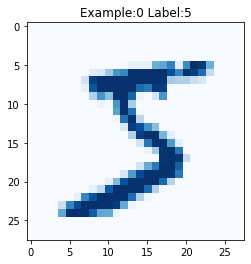

In [8]:
#explore data
def view_digit(example):
  label = y_train.loc[0]
  image = X_train.loc[example,:].values.reshape([28,28])
  plt.title('Example:%s Label:%s'  %(example,label))
  plt.imshow(image,cmap =plt.get_cmap('Blues'))
  plt.show()
view_digit(0)


In [9]:
#standard PCA
from sklearn.decomposition import PCA
pca  = PCA(n_components=784,whiten=False,random_state=2020)
x_train_pca = pca.fit_transform(X_train)
x_train_pca = pd.DataFrame(data = x_train_pca,index = train_idx)



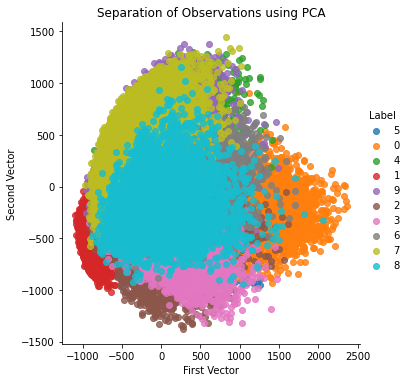

In [10]:
def scatterPlot(xDF, yDF, algoName):
  tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
  tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
  tempDF.columns = ["First Vector", "Second Vector", "Label"]
  sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
  data=tempDF, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Separation of Observations using "+algoName)
scatterPlot(x_train_pca, y_train, "PCA")

*Incremental PCA*

For datasets that are very large and cannot fit in memory, we can perform
PCA incrementally in small batches, where each batch is able to fit in
memory. The batch size can be either set manually or determined
automatically. This batch-based form of PCA is known as incremental PCA.


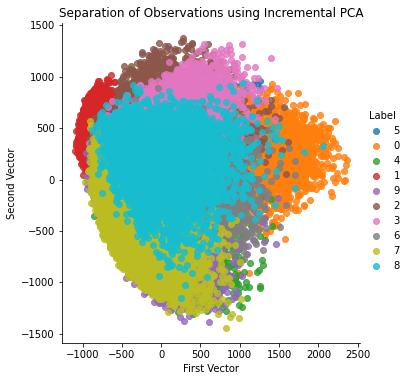

In [11]:
#Incremental PCA
from sklearn.decomposition import IncrementalPCA
incrementalPCA = IncrementalPCA(n_components=784,batch_size=None)
x_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
x_train_incrementalPCA = pd.DataFrame(data=x_train_incrementalPCA,index=train_idx)
x_validation_incrementalPCA =incrementalPCA.transform(X_validate)
x_validation_incrementalPCA = pd.DataFrame(data=x_validation_incrementalPCA,index=validate_idx)
scatterPlot(x_train_incrementalPCA,y_train,"Incremental PCA") 